In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
print(df.shape)
df.head(5)

(11251, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'], axis = 1 , inplace= True)

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# Chaning datatype 
df['Amount']=df['Amount'].astype('int')

In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [11]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### *Exploratory data Analysis*

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


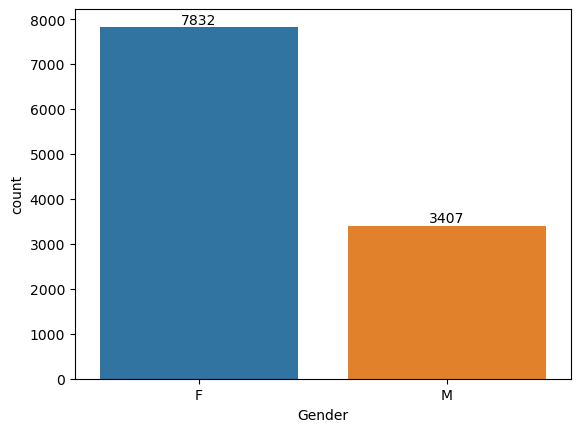

In [13]:
# plotting a bar chart for gender and its counts

ax = sns.countplot(x = 'Gender', data = df, hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)

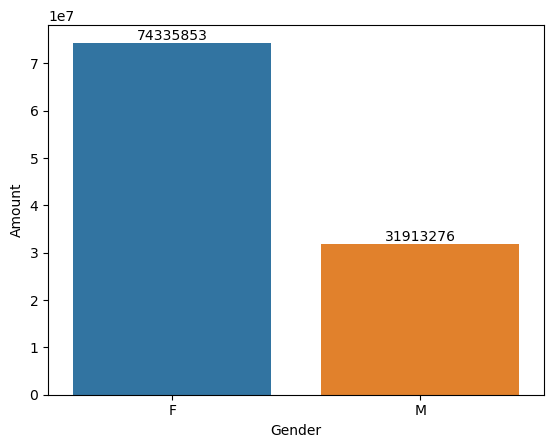

In [36]:
# Gender vs Total amount
data = df[['Gender','Amount']].groupby('Gender').sum()
ax = sns.barplot(x = 'Gender', y = 'Amount', data=data, hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar, labels = [int(values) for values in bar.datavalues])

**From the above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men**

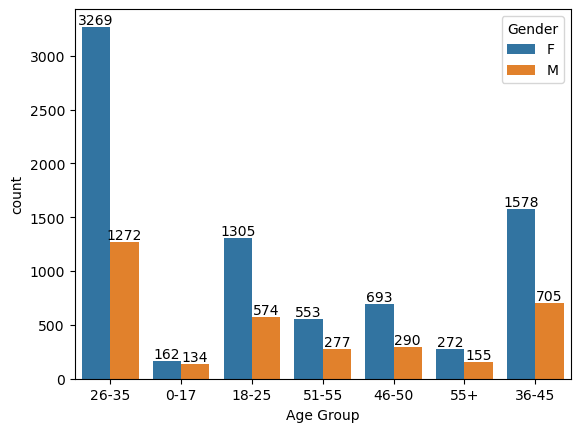

In [44]:
ax = sns.countplot(data = df , x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

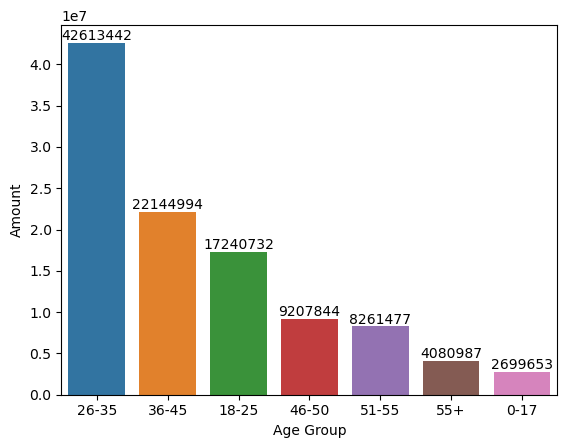

In [64]:
# Total Amount vs Age Group
x = df[['Age Group','Amount']].groupby('Age Group').sum().sort_values(by = 'Amount',ascending= False)
ax = sns.barplot(x = 'Age Group', y = 'Amount', data = x, hue='Age Group')
for bar in ax.containers:
    ax.bar_label(bar, labels= [int(values)  for values in bar.datavalues])

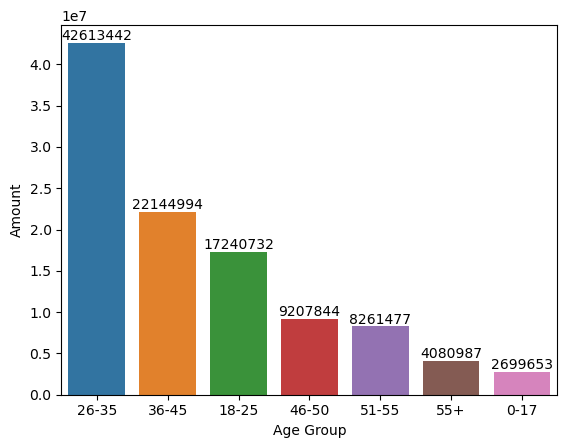

In [69]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

ax = sns.barplot(x= 'Age Group', y = 'Amount', data = sales_age, hue = 'Age Group')
for bar in ax.containers:
    ax.bar_label(bar, labels= [int(values)  for values in bar.datavalues])

<Axes: xlabel='State', ylabel='Orders'>

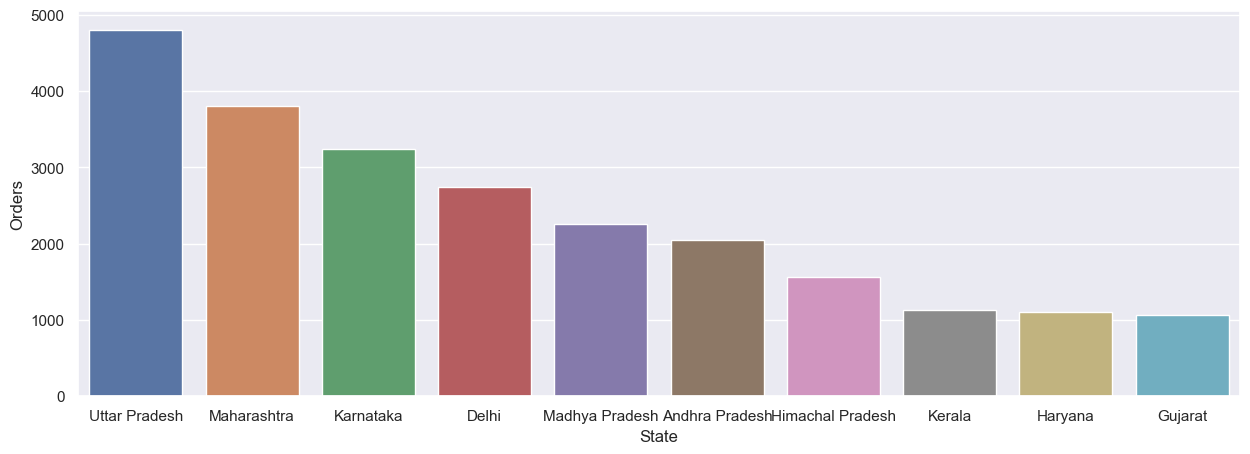

In [77]:
# Total number of order form the top 10 states 

sale_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(data = sale_state, x = 'State', y = 'Orders', hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

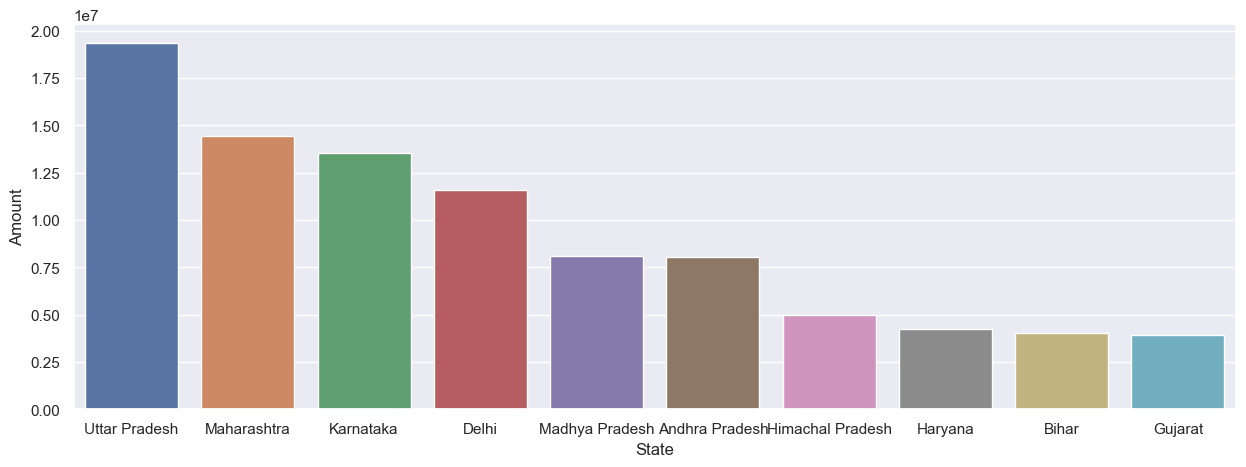

In [81]:
# Total amount/sales from top 10 states 

sale_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.set(rc ={'figure.figsize':(15,5)})
sns.barplot(data = sale_state, x = 'State', y = 'Amount', hue = 'State')

**From the above graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively**

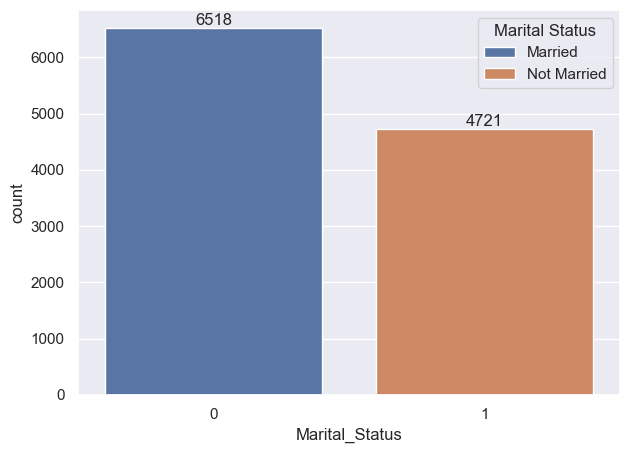

In [96]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue='Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bar in ax.containers:
    ax.bar_label(bar)

ax.legend(title = "Marital Status",labels = ['Married','Not Married'])

<Axes: xlabel='Marital_Status', ylabel='Amount'>

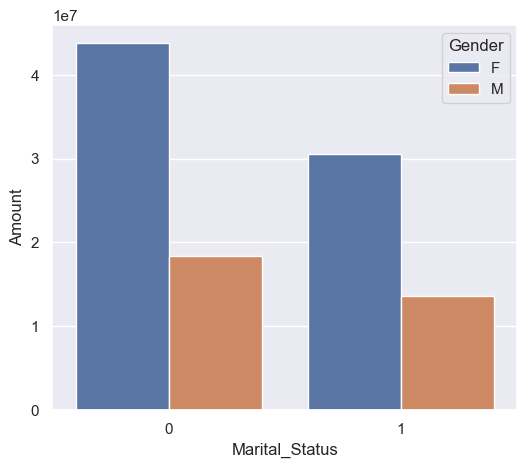

In [97]:
ax = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = ax, x = 'Marital_Status', y='Amount', hue='Gender')

**From above graphs we can see that most of the buyers are married (women) and they have high purchasing power**

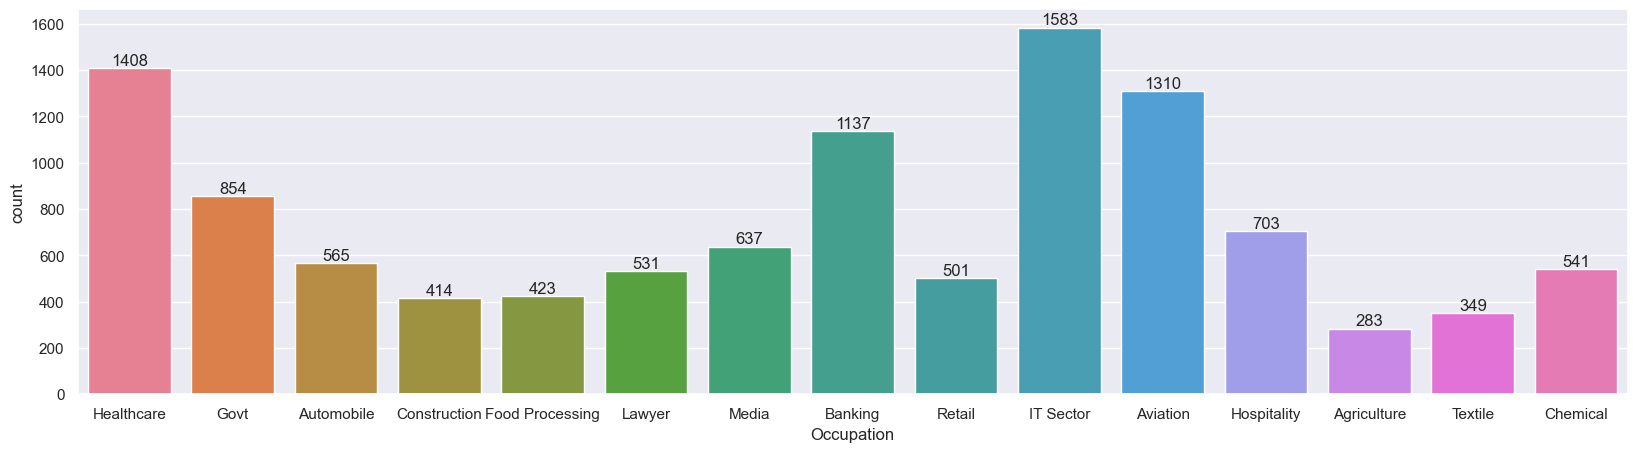

In [99]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')

for bar in ax.containers: 
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

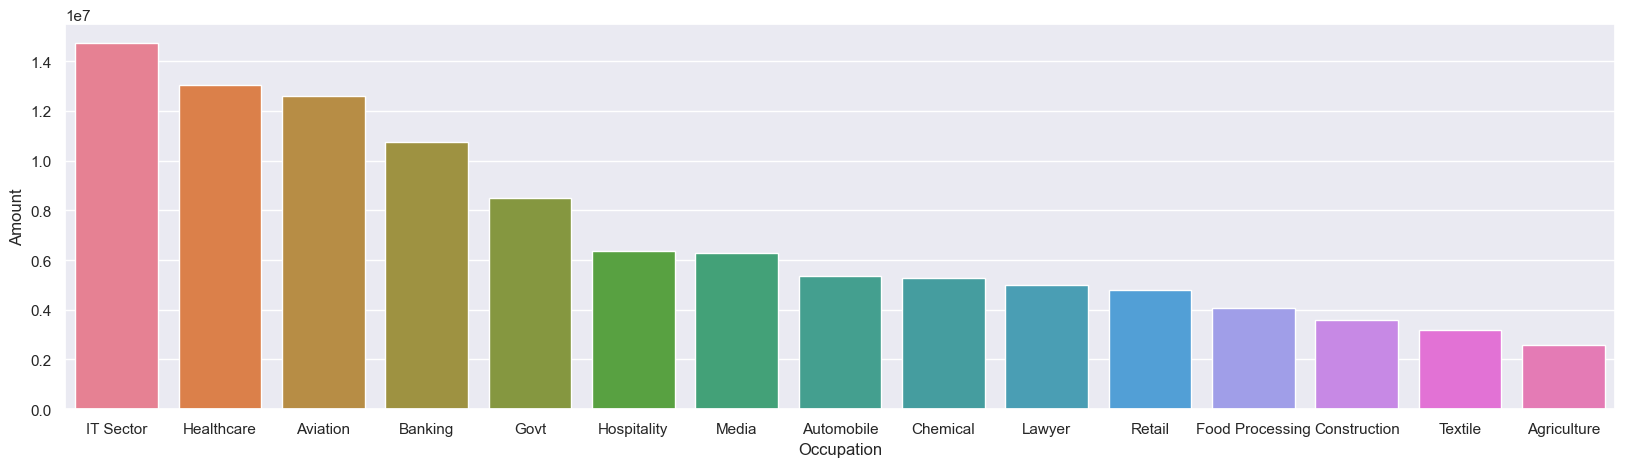

In [101]:
sale = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(data = sale, x = 'Occupation', y = 'Amount', hue = 'Occupation')

**From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

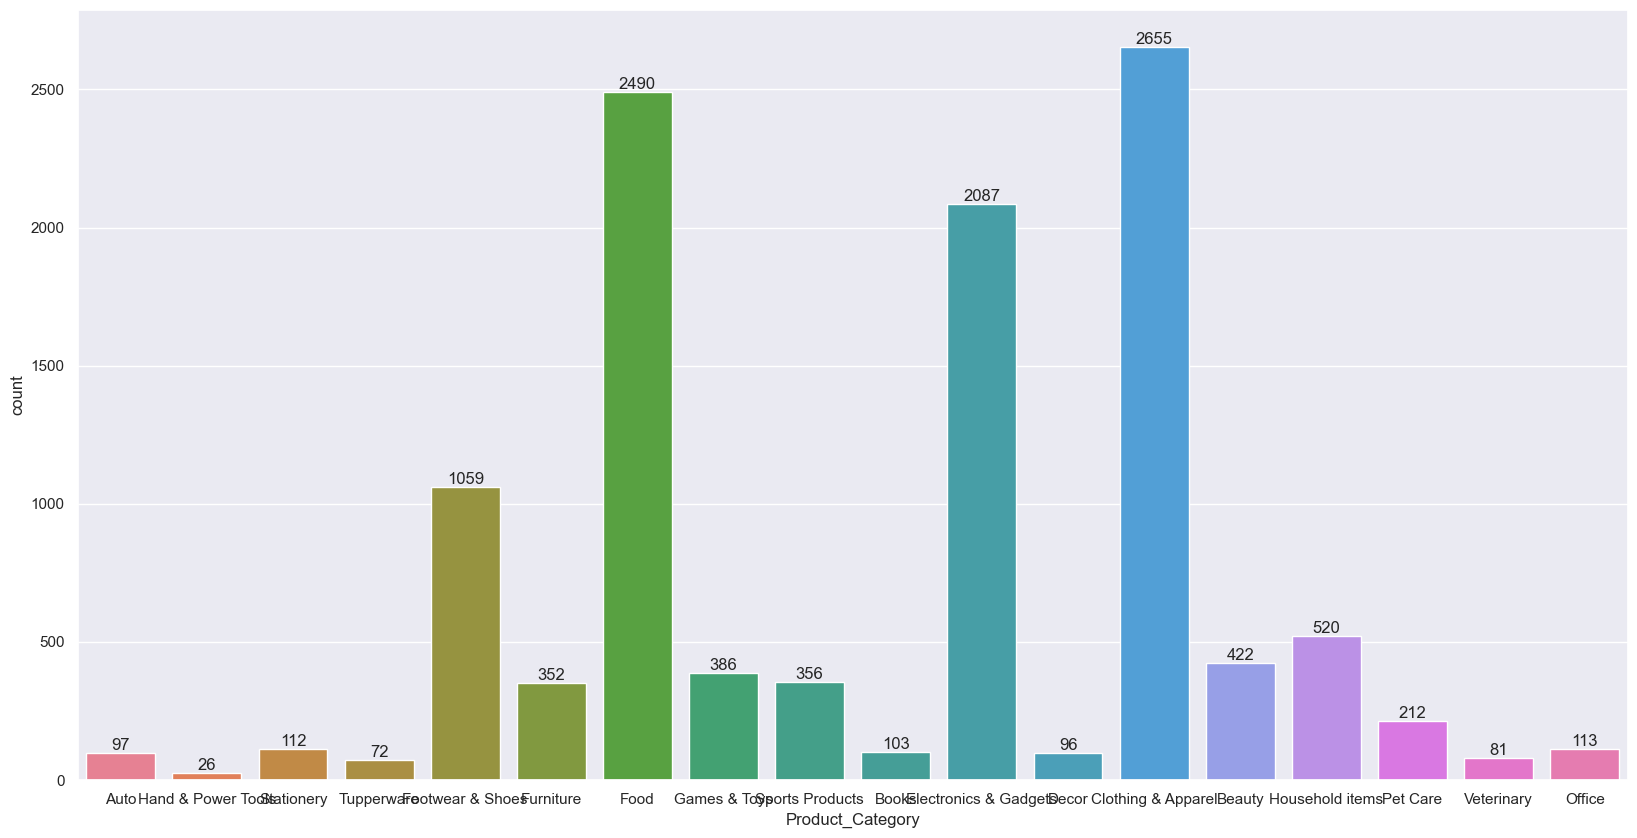

In [103]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category')

for bars in ax.containers: 
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

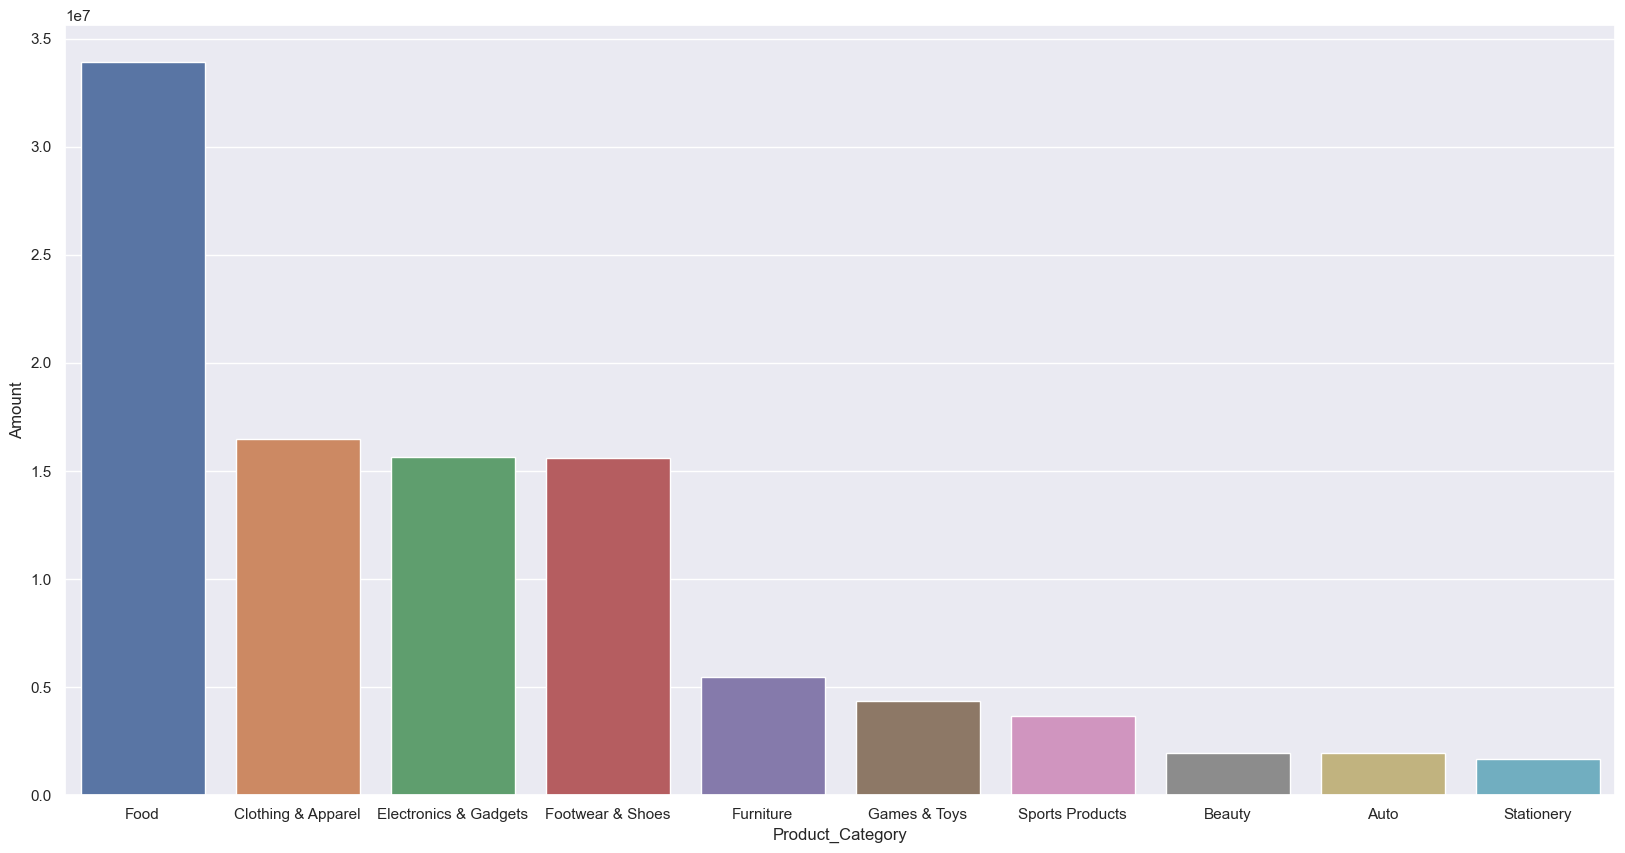

In [106]:
# top 10 Product category and Amount 
sale = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (20,10)})
sns.barplot(data = sale, x = 'Product_Category', y = 'Amount', hue = 'Product_Category')

**From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category**

<Axes: xlabel='Product_ID', ylabel='Orders'>

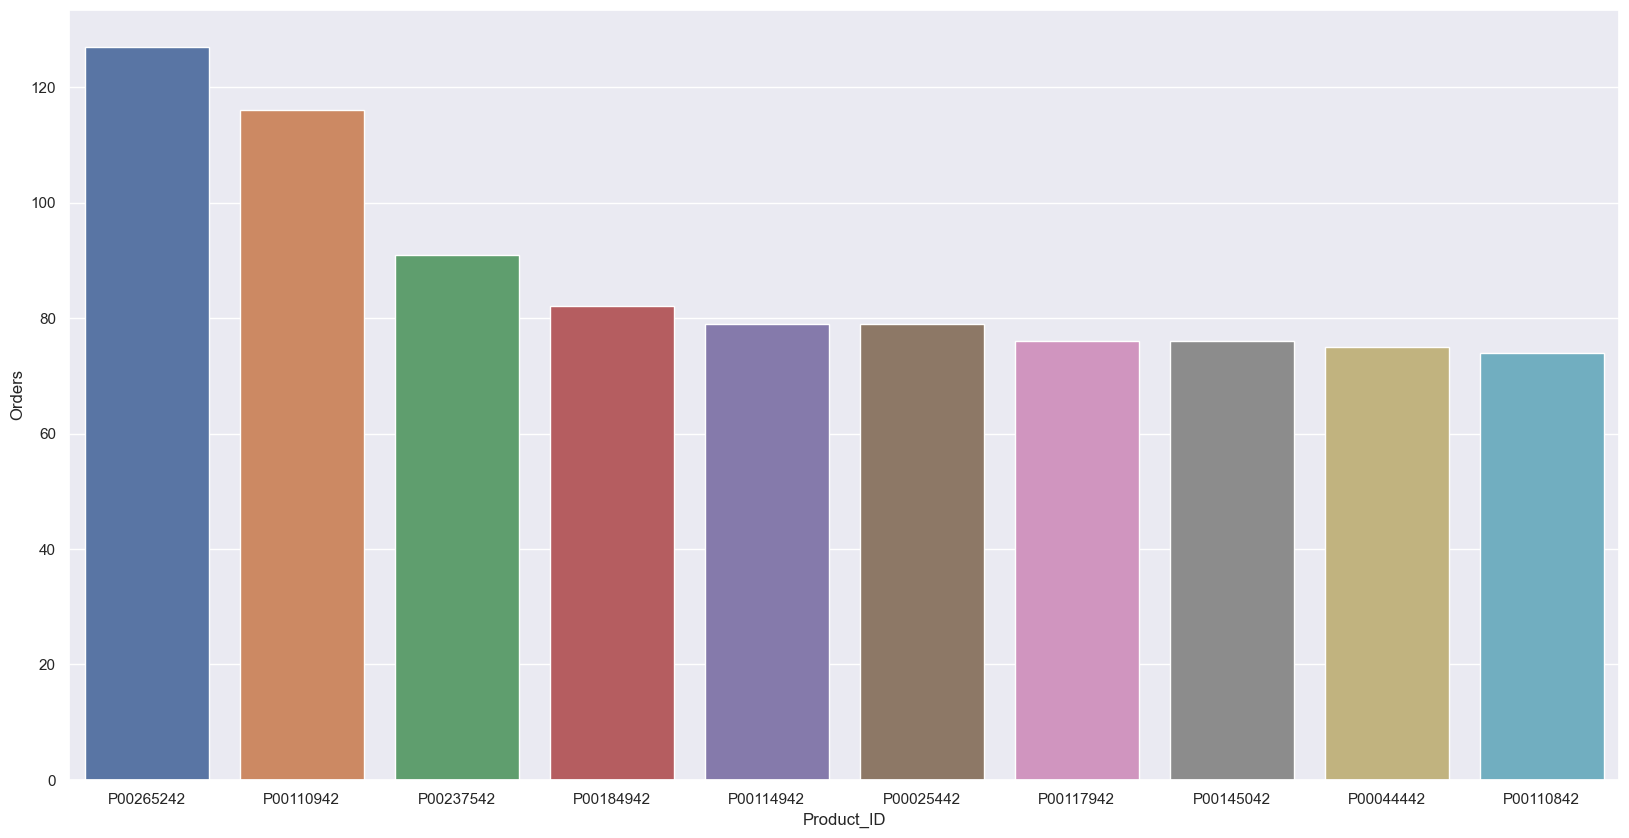

In [109]:
# top 10 most sold products (same thing as above)
sale = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (20,10)})
sns.barplot(data = sale, x = 'Product_ID', y = 'Orders', hue = 'Product_ID')

In [45]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
